In [1]:
import tensorflow
import cv2
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/omr_model.h5')

In [4]:
import cv2
img = cv2.imread('OMR1.jpg')

In [5]:
img1= cv2.resize(img,(2000, 2500))

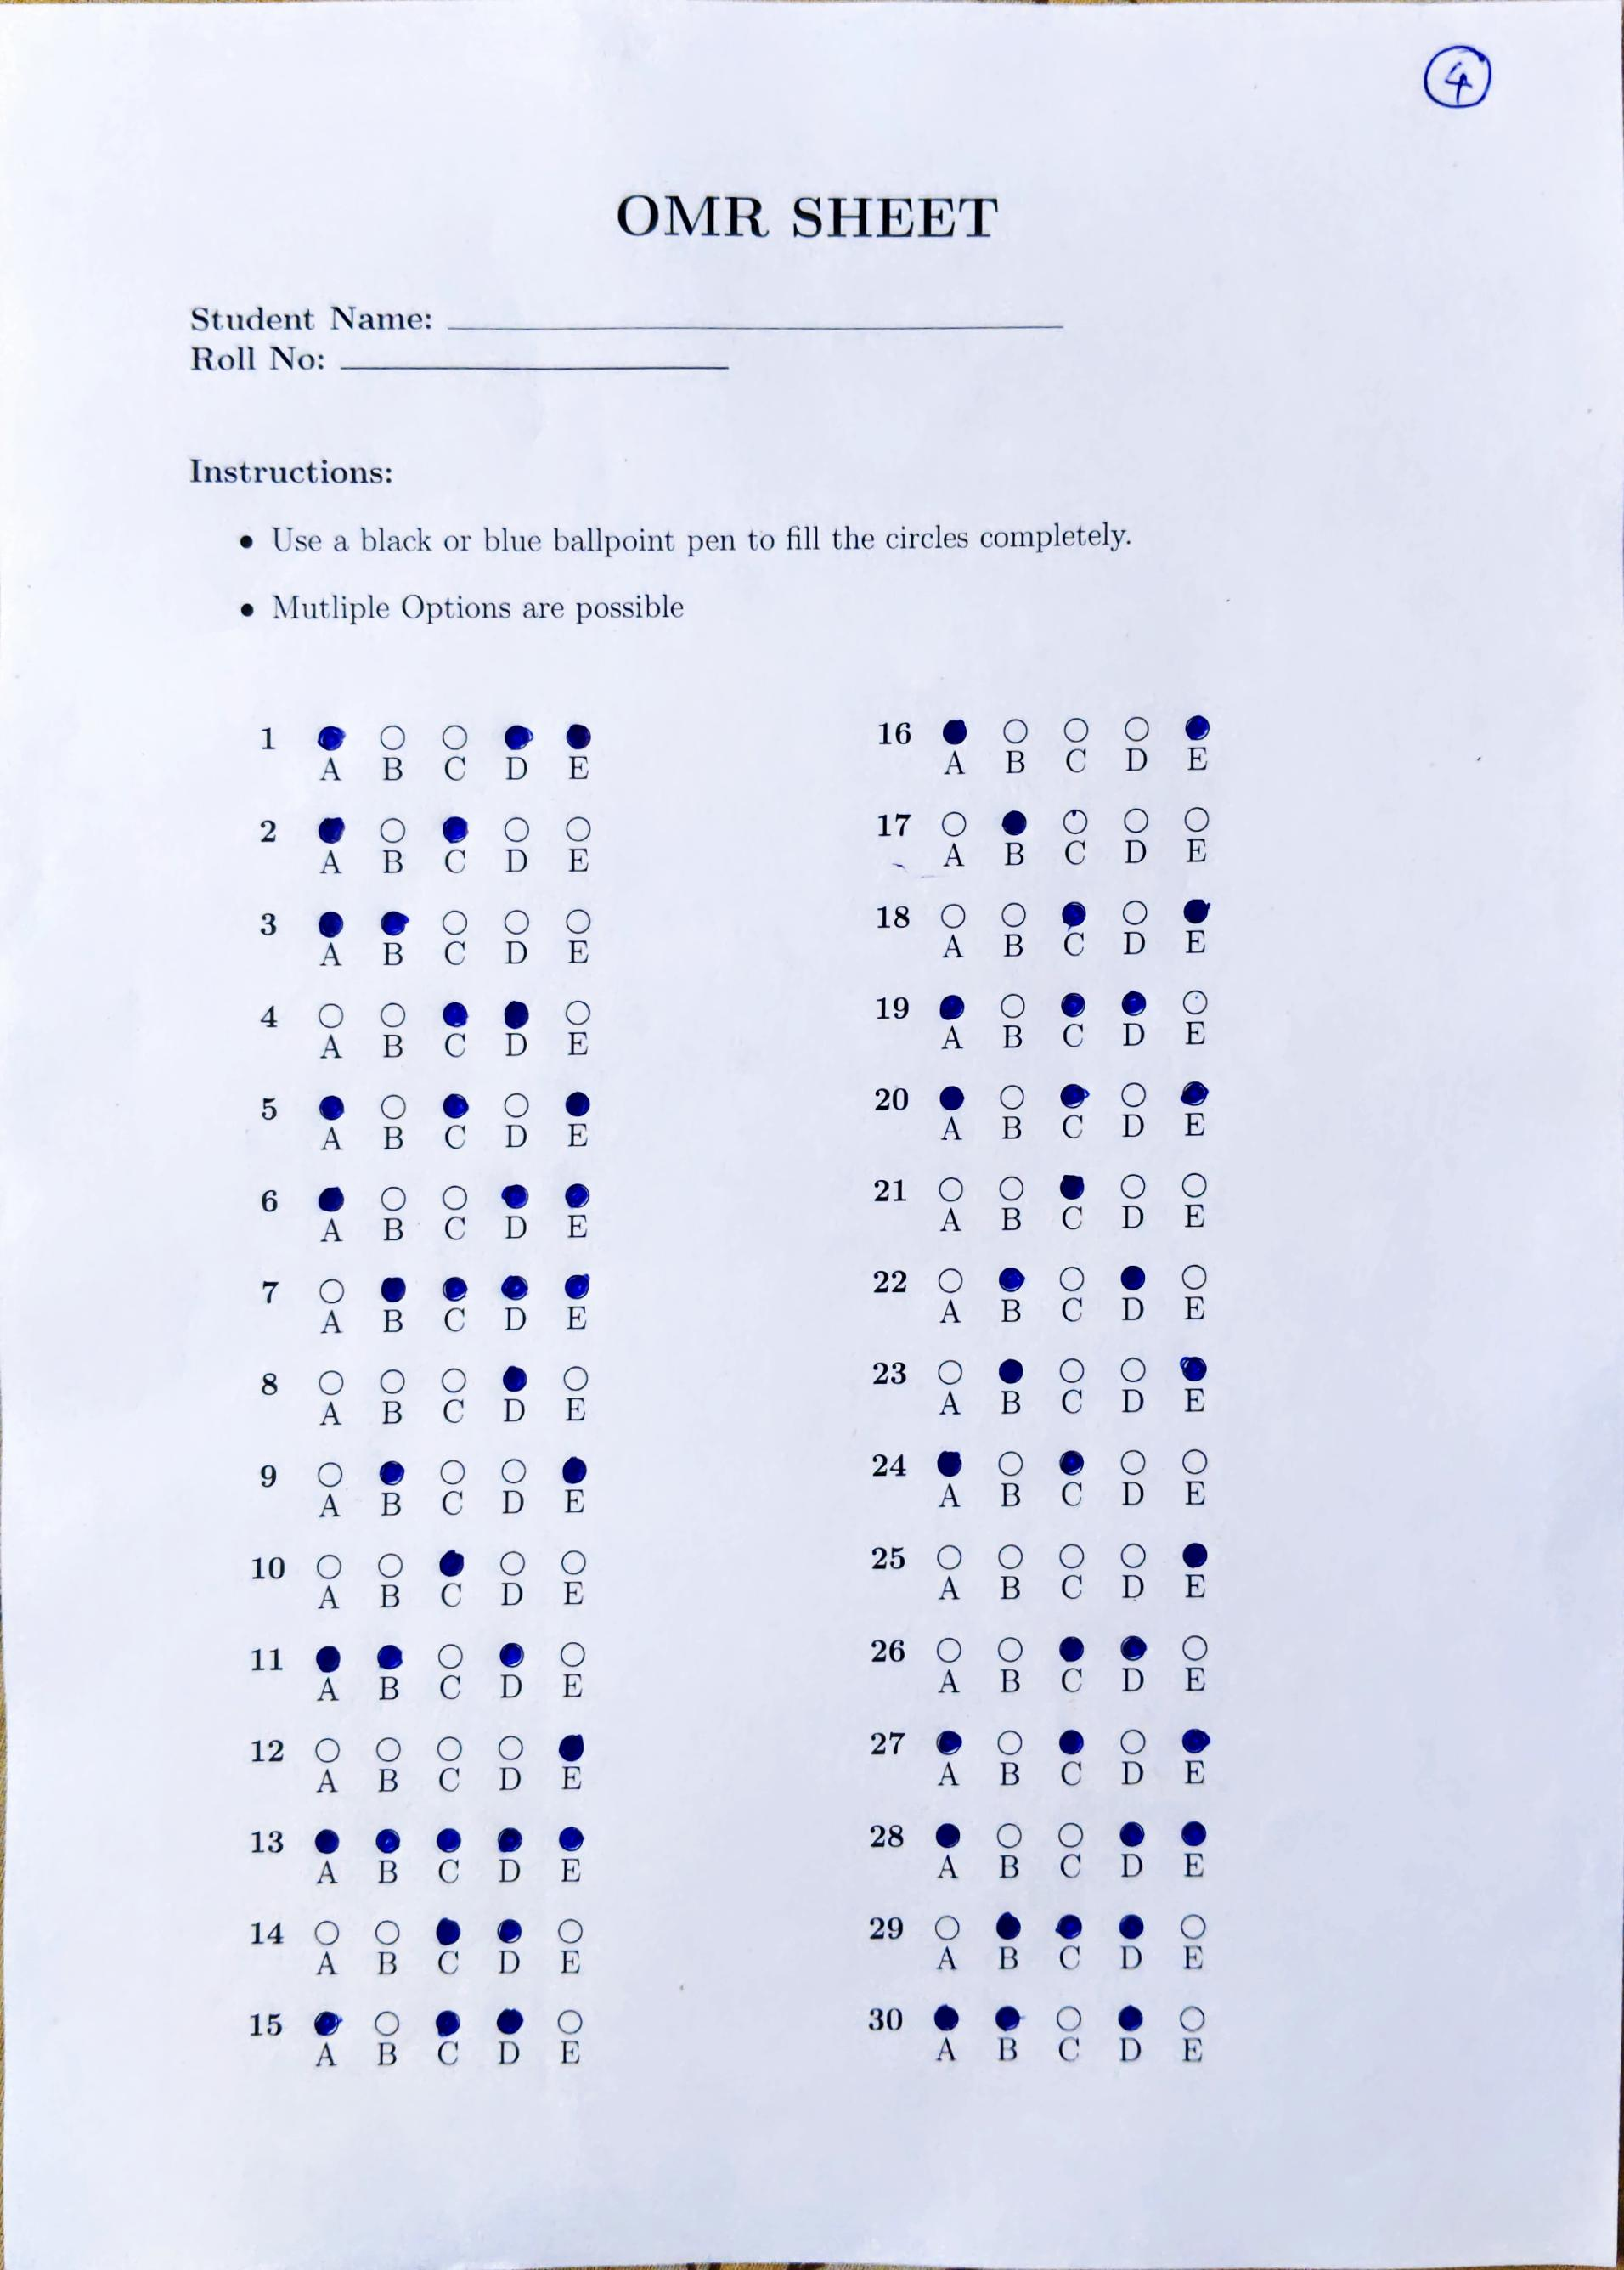

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [7]:
left_half = img1[760:2290, 350:750]
right_half = img1[760:2290, 1130:1510]

In [8]:
img2 = cv2.resize(left_half, (280, 840))
img3 = cv2.resize(right_half, (280, 840))

In [9]:
images=[]
slice_height = 56
slice_width = 280
for i in range(15):
  start = i * slice_height
  end = start + slice_height
  img_slice = img2[start:end, :]
  img_slice = cv2.cvtColor(img_slice, cv2.COLOR_BGR2GRAY)
  img_slice = np.expand_dims(img_slice, axis=-1)
  img_slice =  img_slice/255
  images.append(img_slice)

In [10]:
slice_height = 56
slice_width = 280
for i in range(15):
  start = i * slice_height
  end = start + slice_height
  img_slice = img3[start:end, :]
  img_slice = cv2.cvtColor(img_slice, cv2.COLOR_BGR2GRAY)
  img_slice = np.expand_dims(img_slice, axis=-1)
  img_slice =  img_slice/255
  images.append(img_slice)

In [11]:
images_array = np.array(images)
images_array = images_array.reshape(-1, 56, 280, 1)
pred = model.predict(images_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


In [12]:
threshold = 0.5
predicted_answers = []
for prediction in pred:
    multi_label = (prediction >= threshold).astype(int)
    predicted_answers.append(multi_label)

In [13]:
print(predicted_answers)

[array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0]), array([0, 1, 0, 1, 1]), array([0, 0, 0, 1, 0]), array([0, 1, 0, 0, 1]), array([0, 0, 1, 0, 0]), array([1, 1, 0, 1, 0]), array([0, 0, 0, 0, 1]), array([1, 1, 1, 1, 1]), array([0, 0, 1, 1, 0]), array([1, 0, 1, 1, 0]), array([1, 0, 0, 0, 1]), array([0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1]), array([1, 0, 1, 1, 0]), array([1, 0, 1, 0, 1]), array([0, 0, 1, 0, 0]), array([0, 1, 0, 1, 0]), array([0, 1, 0, 0, 1]), array([1, 0, 1, 0, 0]), array([0, 0, 0, 0, 1]), array([0, 0, 1, 1, 0]), array([1, 0, 1, 0, 1]), array([1, 0, 0, 1, 1]), array([0, 1, 1, 1, 0]), array([1, 1, 0, 1, 0])]


In [14]:
pred

array([[2.84383656e-03, 2.14217301e-03, 1.19023400e-06, 3.01894583e-02,
        6.37821760e-03],
       [1.32041126e-02, 1.55513035e-03, 1.86570702e-04, 2.42317154e-04,
        5.61819934e-06],
       [8.92233395e-04, 7.31115192e-02, 3.46462372e-07, 7.84531367e-05,
        1.74389115e-07],
       [1.83022473e-06, 1.55593865e-02, 6.26440815e-05, 2.33872294e-01,
        6.52295275e-05],
       [4.46968619e-03, 8.74493830e-03, 1.26549028e-04, 5.44243958e-04,
        8.40016827e-02],
       [2.02117134e-02, 4.11676802e-03, 1.72461398e-06, 9.52470303e-01,
        1.83187008e-01],
       [2.34951003e-05, 9.89012778e-01, 5.23316208e-04, 9.90301251e-01,
        5.55620968e-01],
       [3.33143507e-05, 5.32920146e-03, 1.04778737e-05, 9.92322385e-01,
        1.97053814e-04],
       [2.87150731e-04, 9.10854936e-01, 6.64648860e-06, 1.37702707e-04,
        8.51370215e-01],
       [1.88317223e-04, 3.01770633e-03, 7.97638655e-01, 2.12909465e-04,
        5.32400263e-05],
       [6.72097445e-01, 8.1938